In [1]:
#imports 
import pandas as pd 
import seaborn as sns 
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 

# color maps
from matplotlib import cm

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

! pip install scikit-plot 
import scikitplot as skplt

import sys
sys.setrecursionlimit(10000)

#Project



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
animelist = pd.read_csv('/content/drive/Shareddrives/BA820 Team1/Raw data/animelist.csv')

In [4]:
animelist.shape

(109224747, 5)

In [5]:
animelist.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [6]:
animelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


In [7]:
popular = animelist['anime_id'].value_counts(sort = True, ascending = False)
pop = popular.to_frame(name = 'count').reset_index()
pop

,index,count
0,1535,238790
1,16498,216767
2,11757,209919
3,5114,201611
4,4224,196190
...,...,...
17557,48391,1
17558,48427,1
17559,41250,1
17560,47634,1


In [8]:
pop = pop.rename(columns={'index': 'anime_id'})

In [9]:
num_users = len(animelist['user_id'].unique())
num_users

325770

In [10]:
pop['percentage'] = (pop['count']/num_users)*100

In [11]:
pop[pop['percentage'] <= 1].count()

anime_id      12939
count         12939
percentage    12939
dtype: int64

In [12]:
pop['percentage'].count()

17562

In [13]:
pop

,anime_id,count,percentage
0,1535,238790,73.300181
1,16498,216767,66.539890
2,11757,209919,64.437794
3,5114,201611,61.887528
4,4224,196190,60.223471
...,...,...,...
17557,48391,1,0.000307
17558,48427,1,0.000307
17559,41250,1,0.000307
17560,47634,1,0.000307


[Text(0, 0.5, 'Count of Anime'),
 Text(0.5, 0, 'Percentage of Users'),
 Text(0.5, 1.0, 'Distribution of Animes Watched by Percentage of Users')]

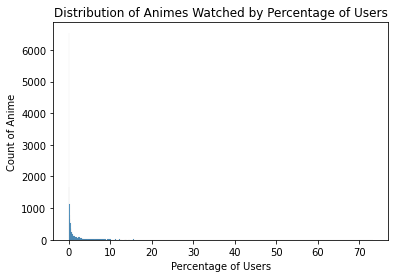

In [14]:
sns.histplot(x = 'percentage', data = pop).set(title = 'Distribution of Animes Watched by Percentage of Users', xlabel = 'Percentage of Users', ylabel = 'Count of Anime')

[Text(0, 0.5, 'Count of Anime'),
 Text(0.5, 0, 'Percentage of Users'),
 Text(0.5, 1.0, 'Distribution of Animes Watched by Percentage of Users')]

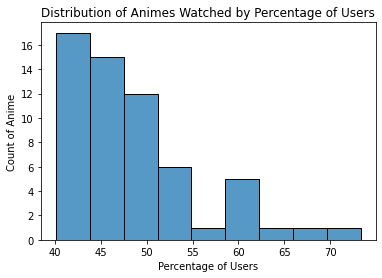

In [14]:
selected = pop[pop['percentage'] >= 40]
sns.histplot(x = 'percentage', data = selected).set(title = 'Distribution of Animes Watched by Percentage of Users', xlabel = 'Percentage of Users', ylabel = 'Count of Anime')

In [15]:
top = []

for i in pop['percentage']: 
  if i > 0.40:
    top.append(i)

In [16]:
len(top)

6933

In [17]:
#top anime where viewer rate is above xx% 
most_pop = animelist['anime_id'].value_counts(sort = True, ascending = False).head(len(top))
pop_df = most_pop.to_frame('count').reset_index()
pop_df 

,index,count
0,1535,238790
1,16498,216767
2,11757,209919
3,5114,201611
4,4224,196190
...,...,...
6928,11465,1308
6929,1295,1306
6930,2796,1306
6931,6686,1304


In [18]:
pop_list = pop_df['index'].to_list()

In [19]:
pop_anime = animelist.copy()

In [20]:
pop_anime.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [ ]:
pop_anime = animelist[animelist['anime_id'].isin(pop_list)]


In [ ]:
pop_anime.shape

# Subset Data 

In [ ]:
#pop_anime = pd.read_csv('/content/drive/Shareddrives/BA820 Team1/Clean data/pop_anime40')

In [ ]:
pop_anime['user_id'].nunique()

In [ ]:
all_watched = pop_anime['user_id'].value_counts()
all = all_watched.to_frame(name = 'count').reset_index()

In [ ]:
all[all['count']==59].count()

In [ ]:
len(user_list)

In [ ]:
pop_anime = animelist[(animelist['anime_id'].isin(pop_list)) & animelist['user_id'].isin(user_list)]

In [ ]:
ratings = pop_anime.pivot_table(values = 'rating', index = 'user_id', columns = 'anime_id')

In [ ]:
ratings = pd.DataFrame(ratings)

In [ ]:
ratings.head()

In [ ]:
ratings.shape

# Clustering 

In [ ]:
##Hierarchical clustering 
pop_anime_clust = ratings.copy()

In [ ]:
pop_anime_clust.astype(int)

In [ ]:
cdist = pdist(pop_anime_clust.values, metric = 'jaccard')


In [ ]:
hc1 = linkage(cdist)
hc2 = linkage(cdist, method = 'complete')
hc3 = linkage(cdist, method = 'average')
hc4 = linkage(cdist, method = 'ward') 

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Single')
single = dendrogram(hc1)

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Complete')
complete = dendrogram(hc2)

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Average')
average = dendrogram(hc3)

In [ ]:
plt.figure(figsize=(5,6))
plt.title('Ward - Jaccard')
ward = dendrogram(hc4)

In [ ]:
#setting clusters by the number of clusters we want 
c1 = fcluster(hc1, 3, criterion = 'maxclust')

In [ ]:
pop_anime_clust['cluster'] = c1

In [ ]:
##KMeans Clustering 
pop_anime_kmeans = ratings.copy()

In [ ]:
#examine how many clusters would be appropriate to use based on inertia
#ideal is low inertia while having low number of k
krange = range(2,100)

cluster_sol = []

for k in krange:
  x = KMeans(k)
  x.fit(pop_anime_kmeans)
  x.predict(pop_anime_kmeans)
  y = x.inertia_
  cluster_sol.append(y)

cluster_sol

In [ ]:
sns.lineplot(krange, cluster_sol).set_title('Number of Clusters to Inertia of Fit')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
#edit with number of clusters 
k = KMeans(5)
labs = k.fit_predict(pop_anime_kmeans)

In [ ]:
pop_anime_kmeans['k'] = labs

In [ ]:
#use silo score to access how appropriately the clusters were assigned based on 5 clusters
#pass through silhouette_score(feature space, cluster assignment)
#want silo to be as close as 1 as possible 
silo_overall = metrics.silhouette_score(pop_anime_kmeans, labs)
silo_overall

In [ ]:
#plotting 
skplt.metrics.plot_silhouette(pop_anime_kmeans, labs, figsize = (10,6))